# アルキメデスの方法で円周率を求める

アルキメデスは円周率を、内接正多角形の周と外接正多角形の周で近似することで求めました。半径1の円に対し、内接正n角形の一辺の長さを $p_n$、外接正n角形の一辺の長さを $P_n$ とおくと、

$$n p_n \le 2\pi \le n P_n$$

が成り立ちます。ここで、

$$ 
\begin{align}
p_{2n} & = \sqrt{2  - \sqrt{4 - p_n^2}}, \\
P_{2n} &= \frac{2 \sqrt{4 + P_n^2} - 4}{P_n}
\end{align}
$$

となるので、$p_n$, $P_n$ が求まれば $p_{2n}$, $P_{2n}$ が求まります。証明は動画を見てください。

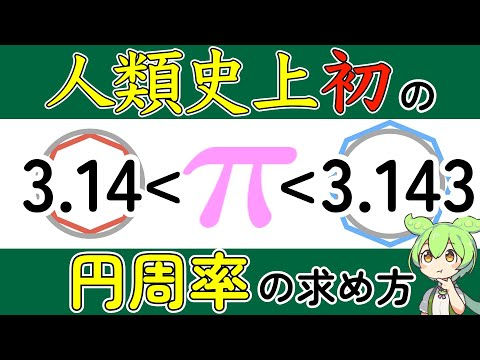

In [2]:
import IPython
IPython.display.YouTubeVideo('dnxdzQtfi0s')

正6角形を考えると、$p_6 = 1$, $P_6 = 2 \tan 30^{\circ} = \frac{2}{\sqrt{3}}$ なので、これから初めて十分大きな $n$ に対して $n p_n$、$n P_n$ を計算して円周率が求まるのか試してみましょう。

ちなみにアルキメデスは不等式 $2\pi \leq n P_n$ を示さなかったようです。古典的な方法でこれを証明する方法は思いつきませんでしたが、三角関数とその微積分を用いれば証明できます。$2\pi \leq n P_n$ は $\frac{2 \pi}{n} \leq \tan \frac{2\pi}{n}$ と同値です。よって一般に $x \leq \tan x$ $(0 \leq x \lt \frac{\pi}{2})$ を示せば十分です。$\tan x - x$ を微分すると

$$\frac{d}{dx} (\tan x - x) = \frac{1}{\cos^2 x} -1 \geq 0 \quad (0 \leq x \lt \frac{\pi}{2})$$

となります。従って

$$0 \leq \int_0^x \frac{1}{\cos^2 x} -1 dx = \tan x - x \quad (0 \leq x \lt \frac{\pi}{2})$$

となります。よって $2\pi \le n P_n$ が成り立ちます。

In [1]:
import math


def inner_polygon_one_side_len(exp_n: int) -> float:
    """
    内接6×2^i角形の１辺の長さを計算
    """
    if exp_n < 0:
        raise ValueError(f"Given value is {exp_n}. exp_n must be greater than or equal to 0.")
    elif exp_n == 0:
        return 1
    
    else:
        prev_len = inner_polygon_one_side_len(exp_n - 1)
        return math.sqrt(2 - math.sqrt(4 - prev_len**2))
        
        
def outer_polygon_one_side_len(exp_n: int) -> float:
    """
    外接6×2^i角形の１辺の長さを計算
    """
    if exp_n < 0:
        raise ValueError(f"Given value is {exp_n}. exp_n must be greater than or equal to 0.")
    if exp_n == 0:
        return 2 / math.sqrt(3)
    
    else:
        prev_len = outer_polygon_one_side_len(exp_n - 1)
        return (2 * math.sqrt(4 + prev_len**2) - 4) / prev_len
        # return 2 * prev_len / (2 + math.sqrt(4 + prev_len**2))


In [2]:
def ceil(num: float, digits: int) -> float:
    return math.ceil(num * 10**digits) / 10**digits

def floor(num: float, digits: int) -> float:
    return math.floor(num * 10**digits) / 10**digits

for i in range(0, 10):
    inner = inner_polygon_one_side_len(i)
    inner_circumference = 6 * 2**i * inner
    
    outer = outer_polygon_one_side_len(i)
    outer_circumference = 6 * 2**i * outer
    
    print(f"正{6 * 2**i}角形")
    print(f"{floor(inner_circumference / 2, 8):.8f} ≦ π ≦ {ceil(outer_circumference / 2, 8):.8f}")
    print("")

正6角形
3.00000000 ≦ π ≦ 3.46410162

正12角形
3.10582854 ≦ π ≦ 3.21539031

正24角形
3.13262861 ≦ π ≦ 3.15965995

正48角形
3.13935020 ≦ π ≦ 3.14608622

正96角形
3.14103195 ≦ π ≦ 3.14271460

正192角形
3.14145247 ≦ π ≦ 3.14187305

正384角形
3.14155760 ≦ π ≦ 3.14166275

正768角形
3.14158389 ≦ π ≦ 3.14161018

正1536角形
3.14159046 ≦ π ≦ 3.14159704

正3072角形
3.14159210 ≦ π ≦ 3.14159375



# 平方根を計算する

アルキメデスの方法で円周率を計算するには平方根を計算する必要があります。アルキメデスは $\sqrt{3}$ を

$$\frac{265}{153} < \sqrt{3} < \frac{1351}{780}$$

と近似したようです。アルキメデスはこれを求めた方法を記録に残さなかったようですが、数学史家によって推測されているようです。ここではその方法を紹介します。ちなみにこの方法は紀元前1600年頃のバビロニア人がすでに知っていたと言われています。

自然数を $\{1, 2, 3, \cdots\}$ とします。$A$ を自然数とし、$\sqrt{A}$ を計算することを考えます。

ある自然数 $m$ により $A = m^2$ と表される場合は、$m$ が答えになります。そのような自然数がない場合は自然数 $m$ で $m < \sqrt{A} < m + 1$ を満たすものが存在します。$b = A - m^2$ とおくと

$$A = m^2 + b$$

となります。このとき、

$$
m + \frac{b}{2m + 1} < \sqrt{m^2 + b} < m + \frac{b}{2m} \tag{1}
$$

が成り立ちます。

大きい方の自然数を基準に、 $m^{\prime} = m + 1$ とおいて、$b^{\prime} = {m^{\prime}}^2 -A$ とおくと、

$$A = {m^{\prime}}^2 - b^{\prime}$$

となります。このとき同様に

$$
m^{\prime} - \frac{b^{\prime}}{2 m^{\prime} - 1} < \sqrt{{m^{\prime}}^2 - b^{\prime}} < m^{\prime}  - \frac{b^{\prime}}{2 m^{\prime} } \tag{2}
$$

が成り立ちます。これを証明しましょう。素直に計算すれば良いです。

## 証明

(1) まず、$\sqrt{m^2 + b} < m + \frac{b}{2m}$ を示しましょう。各辺の2乗の差を取ると

$$
\begin{align}
\left(m + \frac{b}{2m} \right)^2 - (m^2 + b) &= m^2 + b + \frac{b^2}{4m^2} -(m^2 +b)  \\
& = \frac{b^2}{4m^2} > 0
\end{align}
$$

なので $\left(m + \frac{b}{2m} \right)^2 > m^2 + b$ が成り立ち、両辺ルートをとれば求めたい不等式が成り立ちます。

(2) 次に $m + \frac{b}{2m + 1} < \sqrt{m^2 + b}$ を示しましょう。各辺の2乗の差を取ると

$$
\begin{align}
m^2 + b - \left(m + \frac{b}{2m + 1} \right)^2  &= m^2 + b - (m^2 + \frac{2m}{2m + 1} b + \frac{b^2}{(2m + 1)^2}) \\
& = \frac{b}{2m + 1} - \frac{b^2}{(2m + 1)^2} \\
&= \frac{b}{2m + 1} \left(1 - \frac{b}{2m + 1}\right) \\
\end{align}
$$

となります。ここで $m, b > 0$ から $\frac{b}{2m + 1} > 0$ であり、$b = A - m^2 < (m + 1)^2 -m^2 = 2m + 1$ から $1 - \frac{b}{2m + 1} > 0$ となります。よって　$m^2 + b - \left(m + \frac{b}{2m + 1} \right)^2 > 0$ です。

したがって $m^2 + b > \left(m + \frac{b}{2m + 1} \right)^2$ であり、両辺ルートをとれば求めたい不等式が成り立ちます。

これで

$$m + \frac{b}{2m + 1} < \sqrt{m^2 + b} < m + \frac{b}{2m} $$

が示されました。

(3) 次に $\sqrt{{m^{\prime}}^2 - b^{\prime}} < m^{\prime}  - \frac{b^{\prime}}{2 m^{\prime} } $ を示します。各辺の2乗の差を取ると

$$
\begin{align}
\left(m^{\prime} - \frac{b^{\prime}}{2m^{\prime}}\right)^2 - ({m^{\prime}}^2 - b^{\prime}) &= \left({m^{\prime}}^2 - b^{\prime} + \frac{{b^{\prime}}^2}{(2m^{\prime})^2}\right) - ({m^{\prime}}^2 - b^{\prime}) \\
&= \frac{{b^{\prime}}^2}{(2m^{\prime})^2} \\
& > 0
\end{align}
$$

となります。よって ${m^{\prime}}^2 - b^{\prime} < \left(m^{\prime} - \frac{b^{\prime}}{2m^{\prime}}\right)^2$ であり、両辺のルートを取ることで求めたい不等式が示されます。

(4) 最後に $m^{\prime} - \frac{b^{\prime}}{2 m^{\prime} - 1} < \sqrt{{m^{\prime}}^2 - b^{\prime}}$ を示します。

$$b^{\prime} = (m + 1)^2 - A = m^2 - A + 2m + 1 = 2m + 1 - b$$

なので、

$$
\begin{align}
m^{\prime} - \frac{b^{\prime}}{2 m^{\prime} - 1} &= (m + 1) - \frac{2m + 1 - b}{2 (m + 1) + 1} \\
&= m + \frac{b}{2m + 1} \\
&< \sqrt{A} = \sqrt{{m^{\prime}}^2 - b^{\prime}}
\end{align}
$$

となります。最後の不等式は (2) で求めたものです。

## アルキメデスの計算方法

上記で紹介した方法は、$m, b$ を更新することでどんどん精度を上げることができます。アルキメデスも $\sqrt{3}$ を求めたときに $m, b$ をどんどん更新することで精度を上げたと考えられます。

$1 < \sqrt{3} < 2$ なので、$m^{\prime} = 2$, $b^{\prime} = 1$ として不等式を適用すると

$$\frac{5}{3} = 2 - \frac{1}{2 \times 2 - 1} < \sqrt{3} <  2 - \frac{1}{2 \times 2} = \frac{7}{4}$$

となります。$\left(\frac{5}{3}\right)^2 = \frac{25}{9} = 2.77 \cdots$, $\left(\frac{7}{4}\right)^2 = \frac{49}{16} = 3.0625$ なので $\frac{7}{4}$ の方が $\sqrt{3}$ に近いですが、後の計算が楽なので $\frac{5}{3}$ を用います。$\sqrt{3}$ と $\frac{5}{3}$ を比較すると、$3 - \left(\frac{5}{3}\right)^2 = \frac{2}{9}$ なので、

$$\sqrt{3} = \sqrt{\left(\frac{5}{3}\right)^2 - \frac{2}{9}} = \frac{1}{3} \sqrt{5^2 + 2}$$

がわかります。

$m = 5, b = 2$ とおくと、

$$5 + \frac{2}{2 \times 5 + 1} = \frac{57}{11}< \sqrt{5^2 + 2} < \frac{26}{5}= 5 + \frac{2}{2 \times 5}$$

が成り立ちます。よって

$$1.727 \cdots = \frac{19}{11} < \sqrt{3} < \frac{26}{15} = 1.733 \cdots$$

となります。頑張って計算すると、$\frac{26}{15}$ の方が $\sqrt{3}$ に近く、

$$\left(\frac{26}{15} \right)^2 - 3= \frac{676}{225} - \frac{675}{225} = \frac{1}{225}$$

なので

$$\sqrt{3} = \sqrt{\frac{676 - 1}{225}} = \frac{1}{15} \sqrt{26^2 - 1}$$

となります。

$m^{\prime} = 26$, $b^{\prime} = 1$ とおくと、

$$\frac{1325}{51} = 26 - \frac{1}{2 \times 26 - 1} < \sqrt{26^2 - 1} < 26 - \frac{1}{2 \times 26} = \frac{1351}{52}$$

となります。よって

$$\frac{265}{153} = \frac{1}{15} \times \frac{1325}{51} < \sqrt{3} < \frac{1}{15} \times \frac{1351}{52} = \frac{1351}{780}$$

となり、アルキメデスが求めた近似値に辿り着きます。